In [3]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import emcee


In [4]:
#Define our model
def my_model(lam,center,height,width):
    return height * (width/2.)**2 / ((lam - center)**2 + (width/2.)**2)

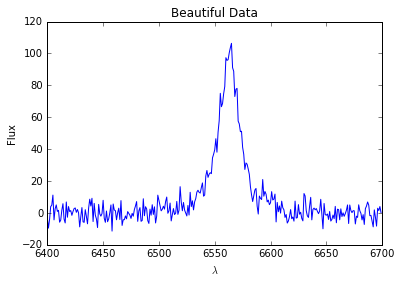

In [5]:
#Set up our fake dataset
my_lam = np.arange(6400,6700,1)#Angstroms
NOISE = 5.0
my_data = my_model(my_lam,6563,100,20) + np.random.normal(0, NOISE,len(my_lam))
my_sigmas = np.zeros(len(my_lam)) + NOISE
plt.plot(my_lam,my_data)
plt.xlabel(r'$\lambda$')
plt.ylabel('Flux')
plt.title('Beautiful Data')
plt.show()

In [7]:
#Let's make a final METRIC, Log Likelihood
def metric_log_likelihood(theta,lam,data,sigmas):
    center, height, width = theta
    return -0.5*(np.sum((data-my_model(lam,center,height,width))**2/sigmas**2 + np.log(sigmas**2)))

In [9]:
#Run "emcee"
ndim, nwalkers = 3, 100
p0 = [6560,90,5]
pos = [p0 + np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, metric_log_likelihood, args=(my_lam, my_data, my_sigmas))
sampler.run_mcmc(pos, 1000)


(array([[ 6563.12184141,   100.67050168,    19.39584071],
        [ 6563.13931709,   105.8957824 ,    18.72474891],
        [ 6563.27965282,   105.12353128,    18.42459002],
        [ 6562.89028913,   101.11836224,    19.11515473],
        [ 6563.20695837,   102.80308602,    19.01011843],
        [ 6562.98569887,   104.47768884,    18.62944452],
        [ 6563.10089896,   103.62953327,    19.00514212],
        [ 6563.20611311,   101.39623993,    19.88193387],
        [ 6562.84757523,   105.6172737 ,    17.95256143],
        [ 6563.0438046 ,   101.58721474,    19.67420674],
        [ 6562.76373013,   101.75546289,    19.06817291],
        [ 6563.27166012,   102.83939016,    19.48977908],
        [ 6563.15187053,   103.01485306,    19.29312322],
        [ 6563.13222479,   100.90111168,    19.65372234],
        [ 6562.97073893,   101.434369  ,    19.9241513 ],
        [ 6563.05573933,   102.26813723,    19.70384942],
        [ 6563.02892643,   102.6379639 ,    18.90802287],
        [ 6563

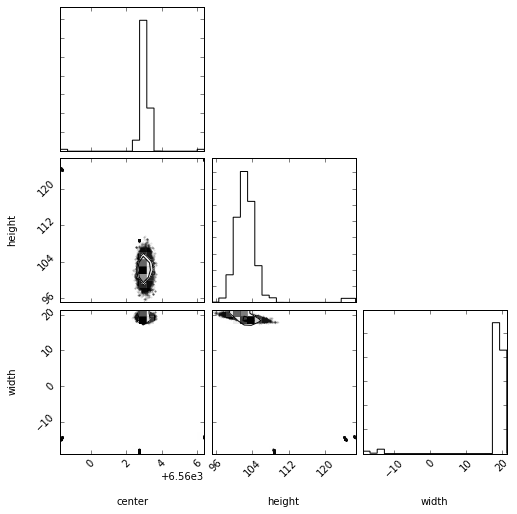

In [12]:
samples = sampler.chain[:, 500:, :].reshape((-1, ndim))
import corner
corner.corner(samples, labels=["center", "height", "width"])
plt.show()

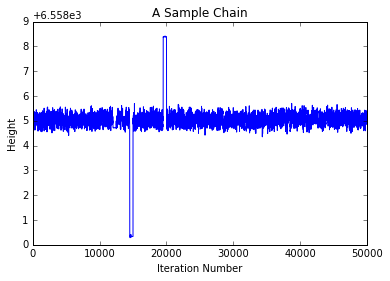

In [14]:
plt.plot(samples[:,0])
plt.xlabel('Iteration Number')
plt.ylabel('Height')
plt.title('A Sample Chain')
plt.show()

#Plot the other Chains


In [25]:
#Chatting about Percentiles
print "CENTER",np.percentile(samples[:,0],[16,50,84])
print "HEIGHT",np.percentile(samples[:,1],16),np.percentile(samples[:,1],50),np.percentile(samples[:,1],84)
print "WIDTH",np.percentile(samples[:,2],16),np.percentile(samples[:,2],50),np.percentile(samples[:,2],84)


CENTER [ 6562.8569779   6563.03679283  6563.21775717]
HEIGHT 102.913374778
HEIGHT 100.634688188 102.457213511 104.404387045
WIDTH 18.7689818114 19.2818433182 19.7595594856
